<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Helo Colab!")
print("Connected to Github!")l

Hello Colab!
Connected to Github!


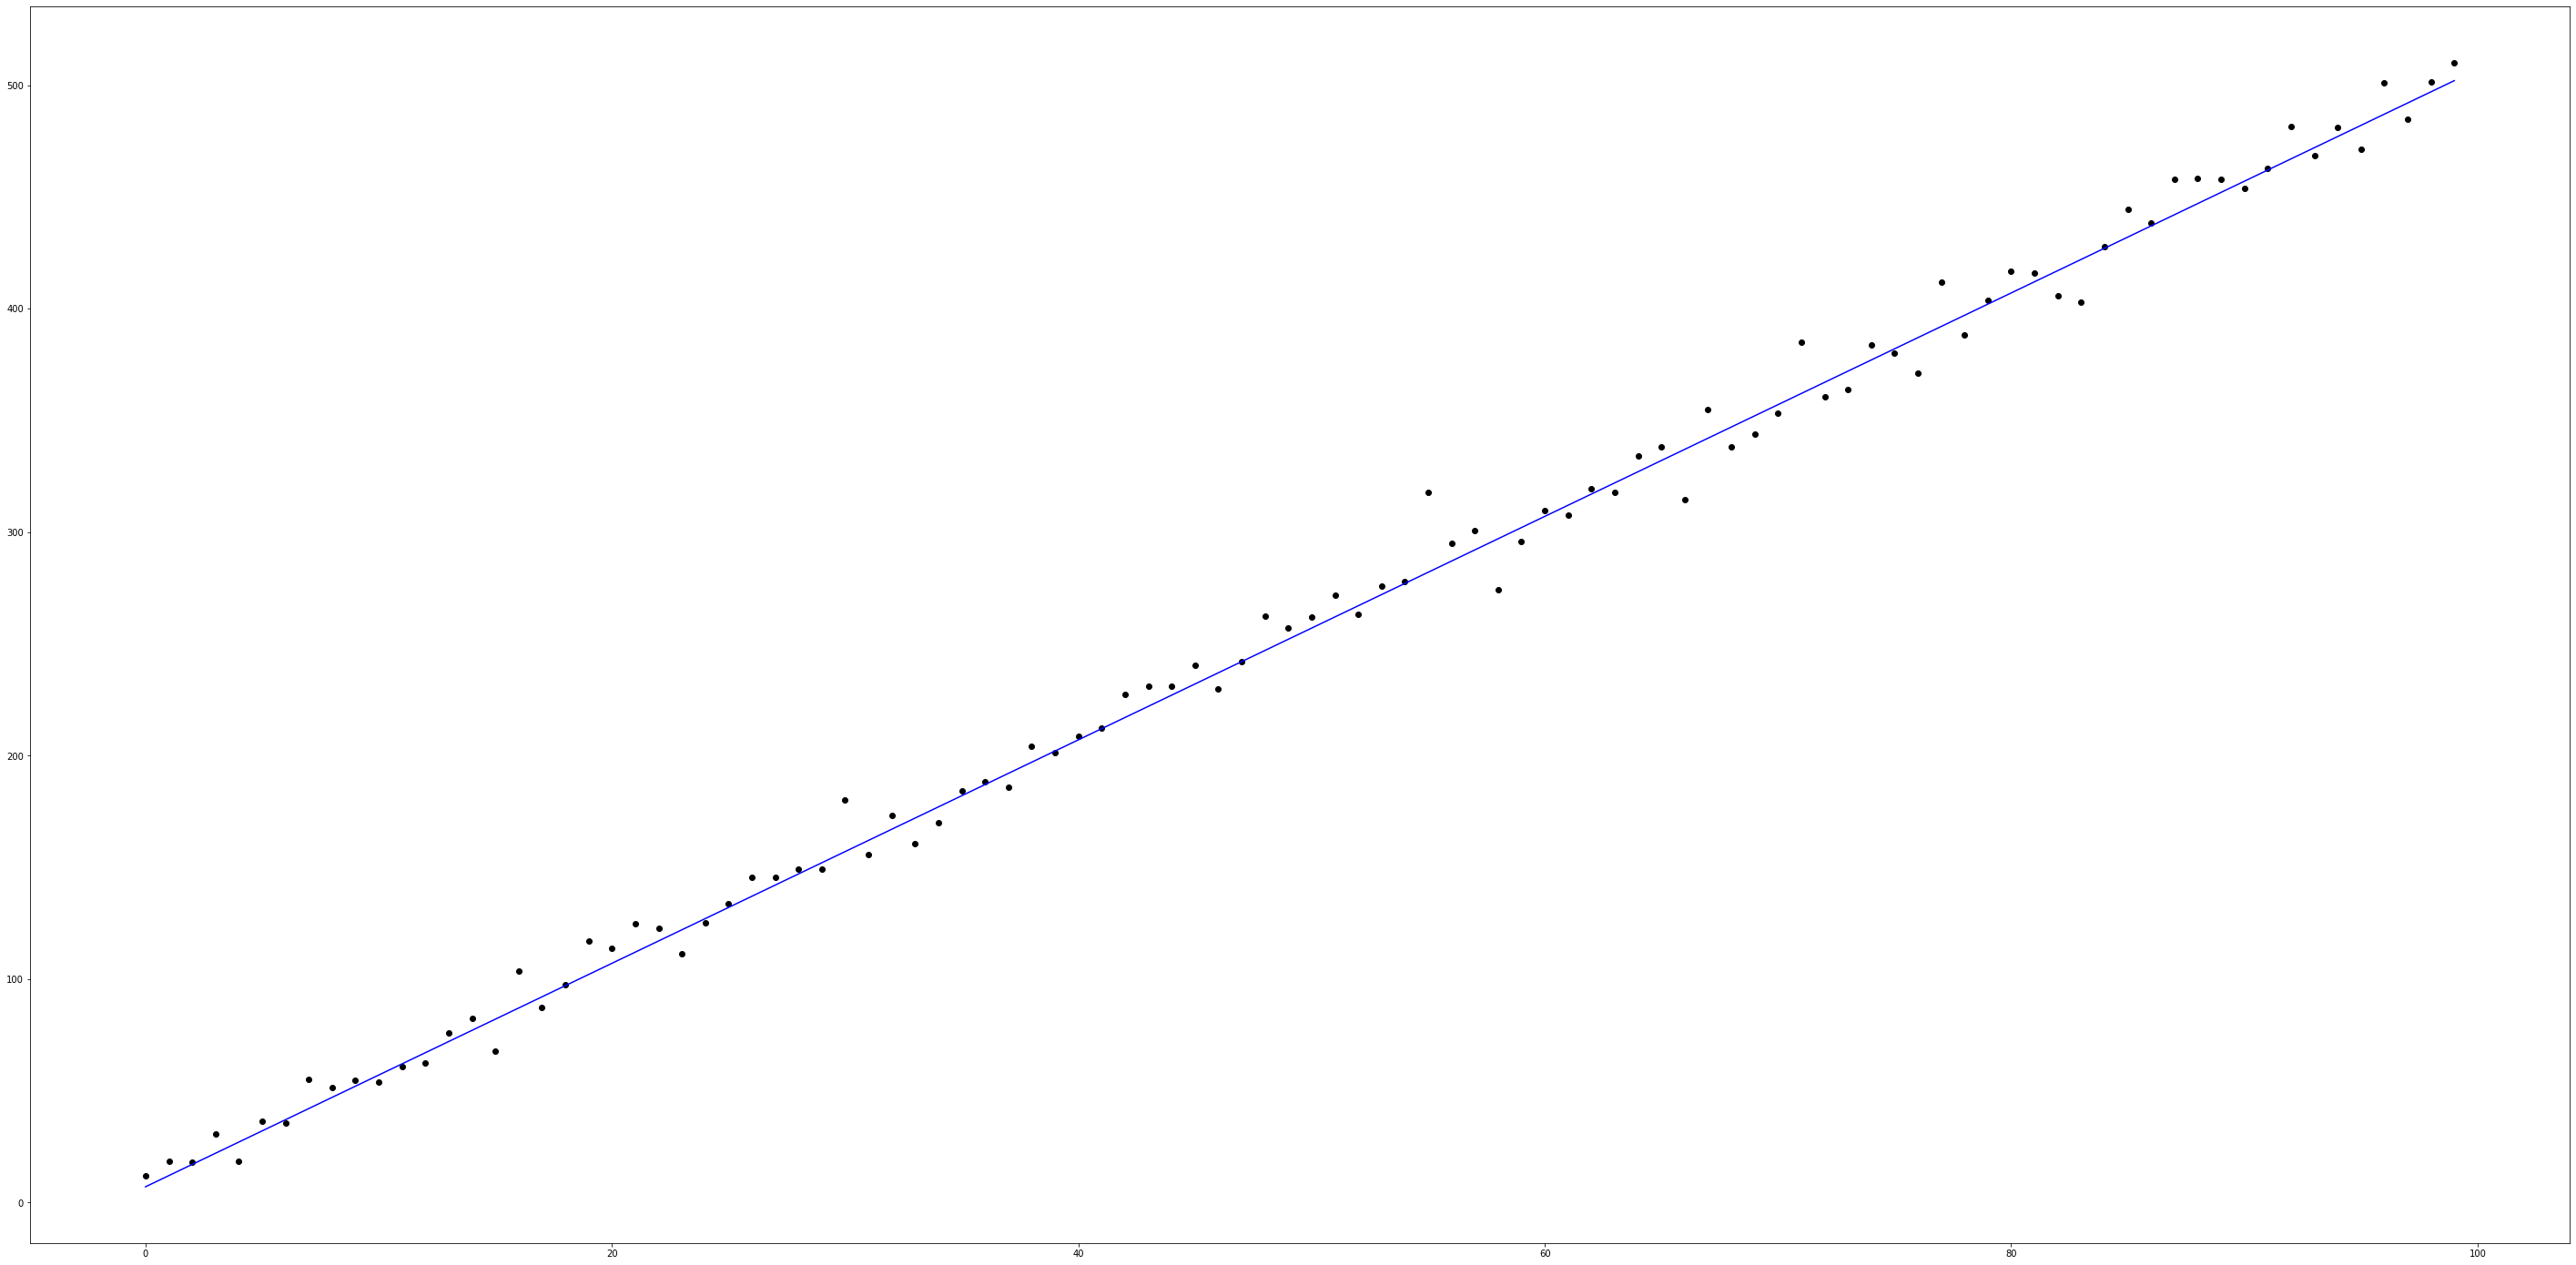

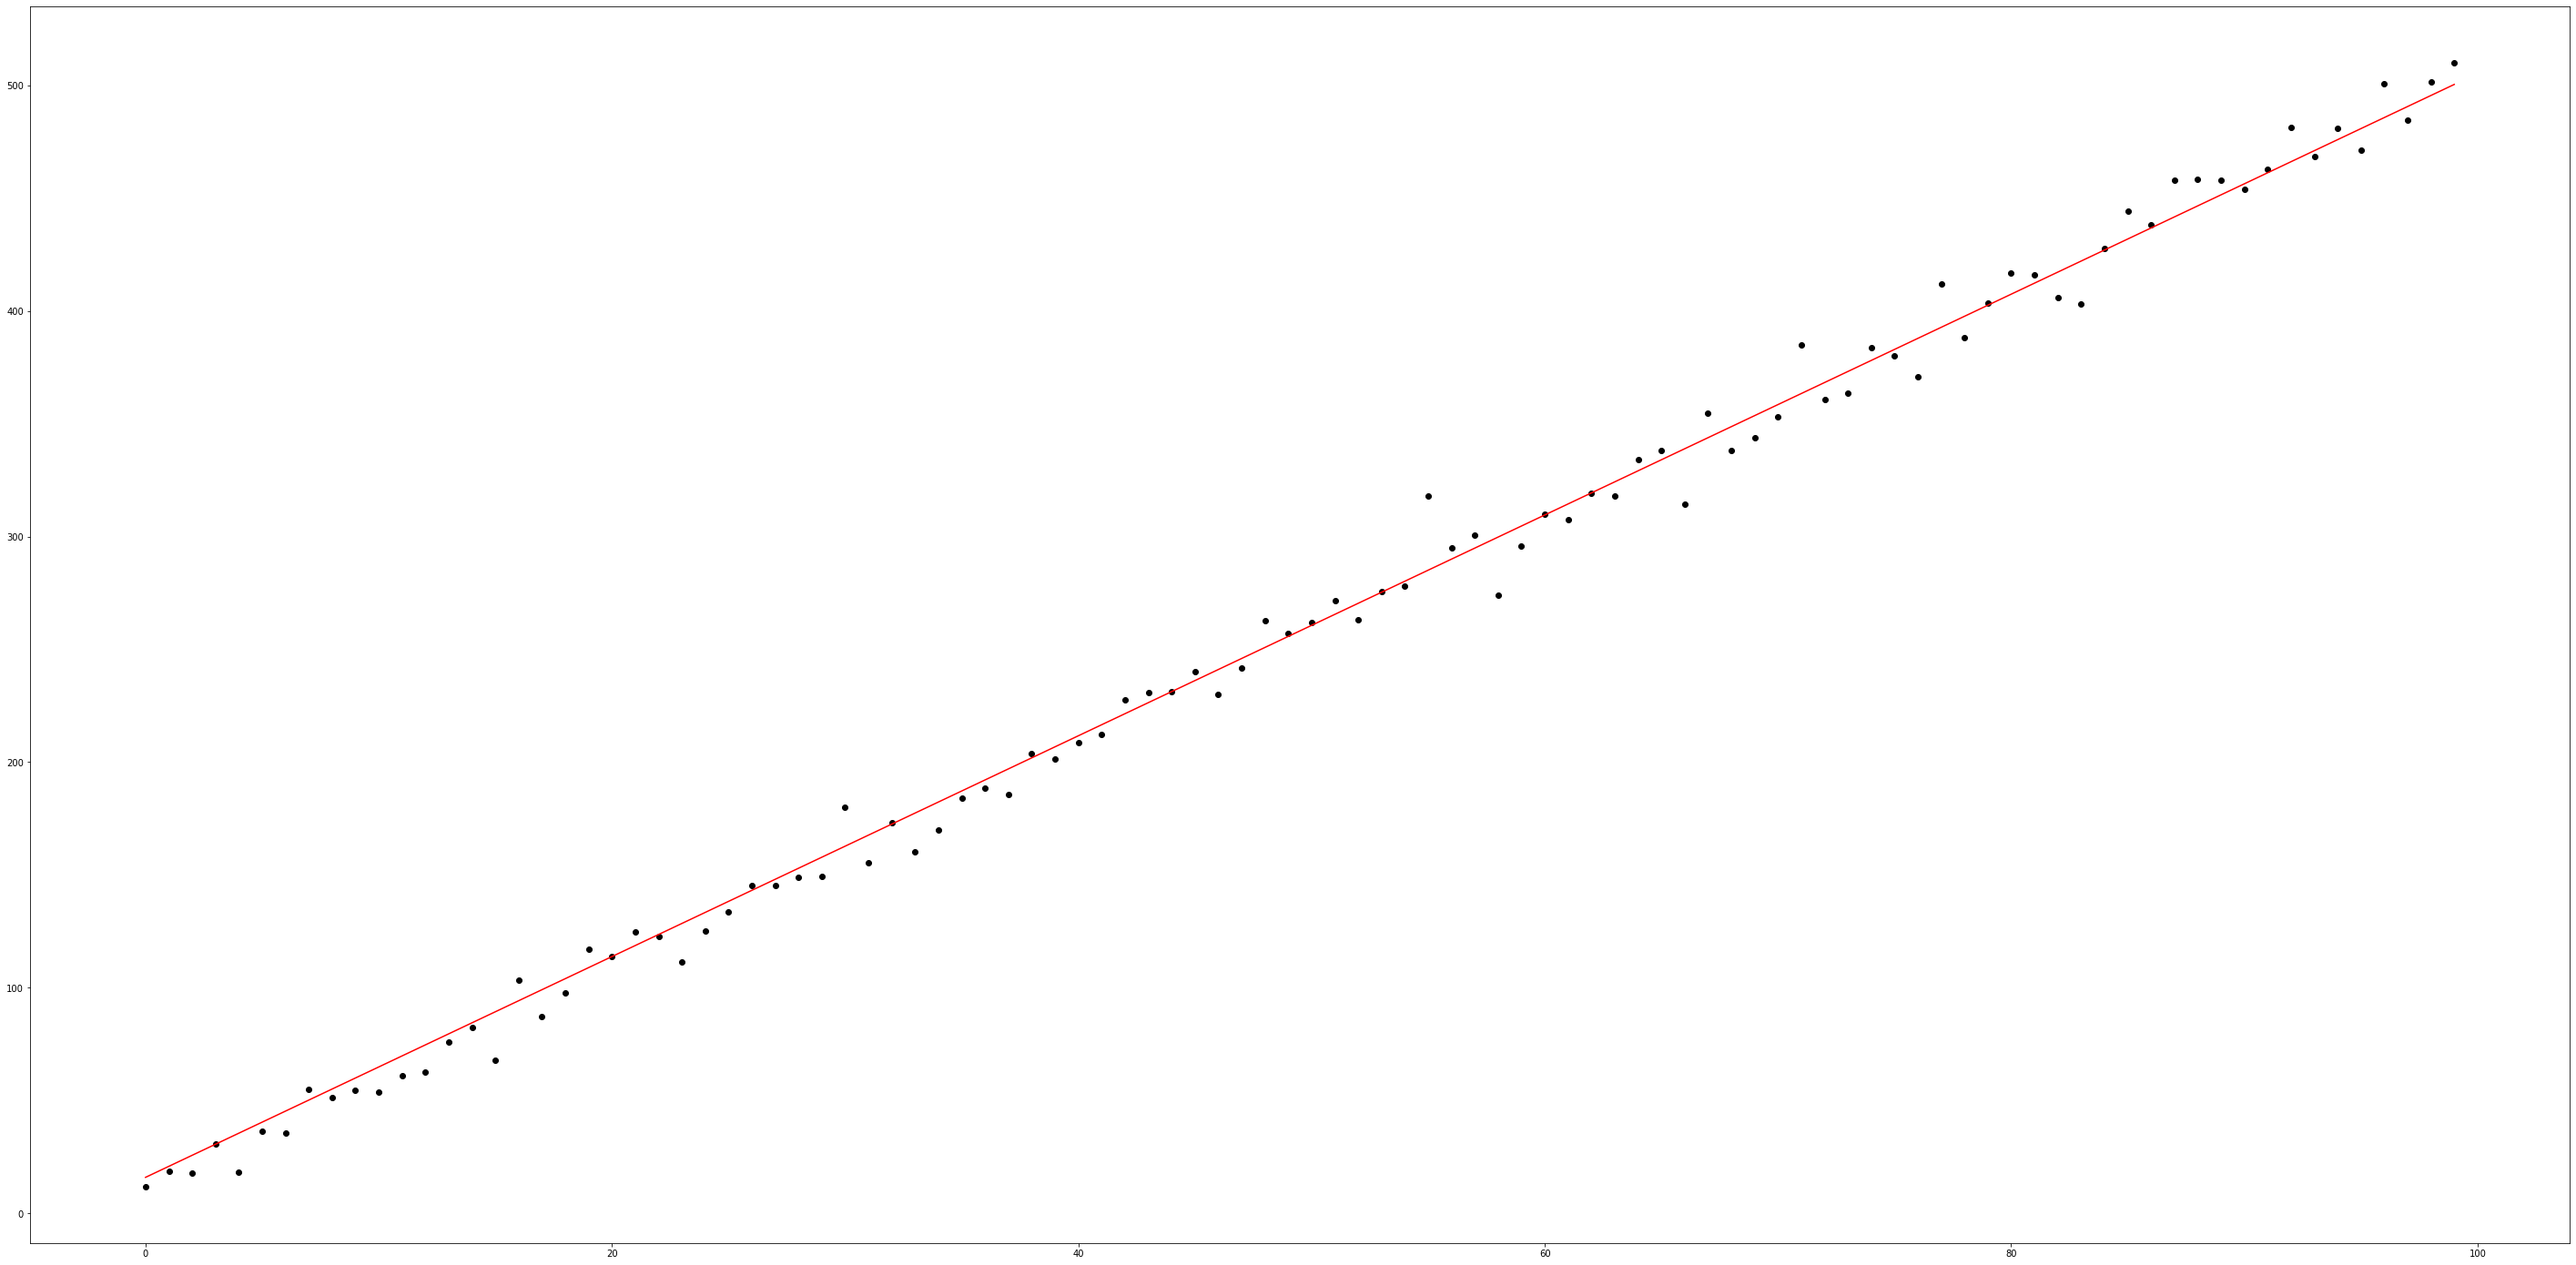

(15.973889390358702, 4.893276491960956)


In [14]:
# Assignment 1 - 1
# # Generate Data Input data and plotting it.

# we need numpy for normal distribution random number.
import numpy

# number of point pairs
count_of_samples = 100

# linear_function = ax + b
linear_factor_a = 5
linear_factor_b = 7

# N(0, a^2)
normal_distribution_location = 0
normal_distribution_scale = 10

numbers_by_normal_distribution = numpy.random.normal(
    loc = normal_distribution_location,
    scale = normal_distribution_scale,
    size = count_of_samples)

def get_y_by_linear(a, b, x):
    return (a * x) + b

x_to_y_hat = {}
x_to_y_with_n = {}

# make point pairs to be plotted.
for x, n in zip(range(count_of_samples), numbers_by_normal_distribution):
    y_hat = get_y_by_linear(linear_factor_a, linear_factor_b, x)
    y_with_n = y_hat + n

    x_to_y_hat[x] = y_hat
    x_to_y_with_n[x] = y_with_n

# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot


def make_plot(plot_data_list):
    # it's too samll. make bigger.
    pyplot.figure(figsize=(50, 25))

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
        if plot_type is "scatter":
            pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

print(f"theta_0 : {linear_factor_b}, theta_1 : {linear_factor_a}")
make_plot([(x_to_y_hat, "plot", "blue"), (x_to_y_with_n, "scatter", "black")])
show_plot()

# linear regression by Gradient Descent

# Gradient Descent를 위해 변형된 cost function
def calc_cost_sum(theta_pair, data_dic, will_multiply_x):
    ret = 0

    m = len(data_dic)

    for x, y_in_data in data_dic.items():
        # hθ(x) =θ0 + θ1 * x
        # x에 곱해지는건 θ1이다. 
        calc_y = get_y_by_linear(theta_pair[1], theta_pair[0], x)
        calc_result = calc_y - y_in_data
        if will_multiply_x:
            calc_result = calc_result * x

        ret = ret + calc_result

    return ret / m

def check_convergence(theta_pair, new_theta_pair):
    # float 형의 자료형 동일한지 판단을 위해 numpy를 사용.
    import numpy

    atol = 0.00000000001

    return numpy.isclose(theta_pair[0], new_theta_pair[0], atol=atol) and numpy.isclose(theta_pair[1], new_theta_pair[1], atol=atol)


def next_gradient_descent_step(step_size, theta_pair, data_dic):
    next_theta_0 = theta_pair[0] - step_size * calc_cost_sum(theta_pair, data_dic, False)
    next_theta_1 = theta_pair[1] - step_size * calc_cost_sum(theta_pair, data_dic, True)

    return next_theta_0, next_theta_1

current_theta_pair = (x_to_y_with_n[0] * 2, x_to_y_with_n[1] - x_to_y_with_n[0] * 2)

# current_theta_pair = (500000, 10)

step_size = 0.0001

while(True):
    next_theta_pair = next_gradient_descent_step(step_size, current_theta_pair, x_to_y_with_n)

    if check_convergence(current_theta_pair, next_theta_pair):
        break 
    
    current_theta_pair = next_theta_pair

    
# make point pairs to be plotted.
solution_by_linear_regression_plot = {}
for x in range(count_of_samples):
    y_hat = get_y_by_linear(current_theta_pair[1], current_theta_pair[0], x)

    solution_by_linear_regression_plot[x] = y_hat

make_plot([(solution_by_linear_regression_plot, "plot", "red"), (x_to_y_with_n, "scatter", "black")])
show_plot()

print(current_theta_pair)
 